In [75]:
# BOOKSTORE
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.datasets import make_circles
import time
from IPython.display import clear_output
# Resolving classification problem where we have to separate two groups

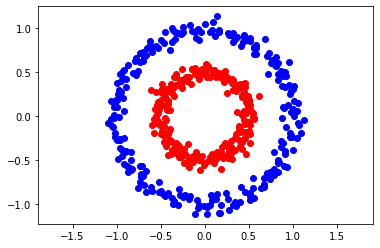

In [68]:
# CREATING DATASET
# make_circles?
n = 500
p = 2
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0,1], c="blue")
plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1,1], c="red")
plt.axis("equal")
plt.show()

In [13]:
# NET LAYER CLASS
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1

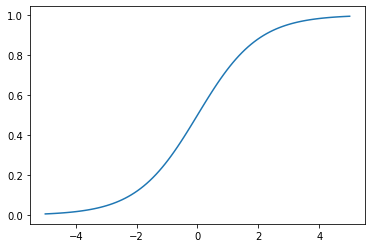

In [29]:
# ACTIVATIONS FUNCTIONS
# Suma ponderada, introducir no linealidades, combinar neuronas.
sigm = (lambda x: 1/(1+np.e**(-x)),  # Sigmoide function, distorcion of a range between 0-1,
        lambda x: x*(1-x))
relu = lambda x: np.maximum(0,x)

_x = np.linspace(-5,5,100)
plt.plot(_x, sigm[0](_x))

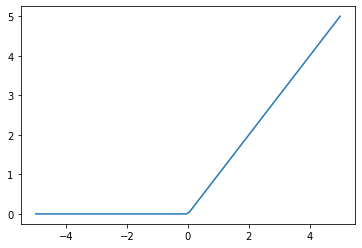

In [27]:
plt.plot(_x, relu(_x))

In [51]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f):
  nn = []
  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn

In [77]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
           lambda Yp, Yr: (Yp-Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  out = [(None, X)]
  # FORWARD PASS
  for l,layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b # Esto es suma ponderada
    a = neural_net[l].act_f[0](z)
    out.append((z,a))

  print(l2_cost[0](out[-1][1], Y))
  if train:
    # Backward pass
    deltas = []
    for l in reversed(range(0,len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      print(a.shape)
      if l ==len(neural_net)-1:
        # Calcular delta última capa.
        deltas.insert(0,l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
      # Calcular delta respecto a capa previa.
        deltas.insert(0,deltas[0] @ _w.T * neural_net[l].act_f[1](a))
      _w = neural_net[l].w
    # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)


0.2588773319874311
(500, 1)
(500, 8)
(500, 4)


array([[0.39199605],
       [0.43326113],
       [0.38101583],
       [0.40154307],
       [0.39048974],
       [0.39762006],
       [0.39873577],
       [0.43148653],
       [0.42978067],
       [0.41639287],
       [0.39494818],
       [0.40588917],
       [0.39993106],
       [0.38120706],
       [0.3923274 ],
       [0.41973269],
       [0.39648079],
       [0.43136199],
       [0.41969809],
       [0.40677164],
       [0.39248877],
       [0.38107628],
       [0.41326552],
       [0.42875631],
       [0.39325275],
       [0.4104807 ],
       [0.39417155],
       [0.40937382],
       [0.41543295],
       [0.41779113],
       [0.41834509],
       [0.38576241],
       [0.40151562],
       [0.3808218 ],
       [0.41298395],
       [0.42430063],
       [0.42604856],
       [0.37884489],
       [0.37994397],
       [0.39280094],
       [0.42051868],
       [0.4147251 ],
       [0.42063471],
       [0.37943771],
       [0.38818685],
       [0.39327932],
       [0.41989553],
       [0.420

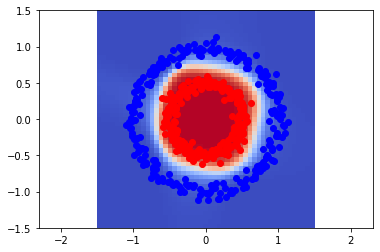

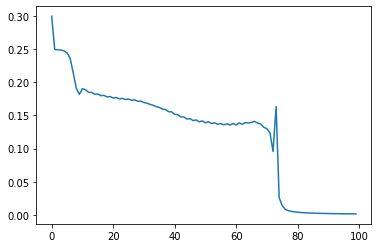

0.0013174702452080811
(500, 1)
(500, 8)
(500, 4)
0.0013157631061281008
(500, 1)
(500, 8)
(500, 4)
0.0013140605757555287
(500, 1)
(500, 8)
(500, 4)
0.0013123626346712145
(500, 1)
(500, 8)
(500, 4)
0.0013106692635685149
(500, 1)
(500, 8)
(500, 4)
0.0013089804432524622
(500, 1)
(500, 8)
(500, 4)
0.0013072961546389374
(500, 1)
(500, 8)
(500, 4)
0.00130561637875386
(500, 1)
(500, 8)
(500, 4)
0.0013039410967323733
(500, 1)
(500, 8)
(500, 4)
0.0013022702898180434
(500, 1)
(500, 8)
(500, 4)
0.0013006039393620669
(500, 1)
(500, 8)
(500, 4)
0.0012989420268224804
(500, 1)
(500, 8)
(500, 4)
0.0012972845337633845
(500, 1)
(500, 8)
(500, 4)
0.0012956314418541646
(500, 1)
(500, 8)
(500, 4)
0.001293982732868726
(500, 1)
(500, 8)
(500, 4)
0.0012923383886847342
(500, 1)
(500, 8)
(500, 4)
0.001290698391282862
(500, 1)
(500, 8)
(500, 4)
0.0012890627227460426
(500, 1)
(500, 8)
(500, 4)
0.001287431365258727
(500, 1)
(500, 8)
(500, 4)
0.0012858043011061548
(500, 1)
(500, 8)
(500, 4)
0.0012841815126736224
(50

In [80]:
neural_n = create_nn(topology, sigm)
loss = []

# Traiting the neural network
for i in range(2500):
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:
    loss.append(l2_cost[0](pY, Y))
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0,1], c="blue")
    plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1,1], c="red")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)